## NAVIE BAYES THEOREM:

### Bayes Theorem Theory:

Bayes Formula:
![](https://miro.medium.com/max/804/1*6dmvRYysiU5PwWIcHRdKVw.png)

Let’s Look into the terms:

P(C | x) = Probability of event C happening given that event x happened
P(x | C) = Probability of event x happening given that event C happened
P(C) = Probability of event C happening
P(x) = Probability of event x happening

The Bayes Theorem thus gives us a way to find the Conditional Probability . Bayes Theorem lies in the heart of the Naive Bayes theorem.

# 1. INTRODUCTION:

Bayes Theorem is named for English mathematician Thomas Bayes, who worked extensively in decision theory, the field of mathematics that involves probabilities.

Bayes Theorem is also used widely in machine learning, where it is a simple, effective way to predict classes with precision and accuracy. The Bayesian method of calculating conditional probabilities is used in machine learning applications that involve classification tasks.

A simplified version of the Bayes Theorem, known as the Naive Bayes Classification, is used to reduce computation time and costs. In this article, we take you through these concepts and discuss the applications of the Bayes Theorem in machine learning.

### How to Apply Bayes Theorem in Machine Learning:

The Naive Bayes Classifier, a simplified version of the Bayes Theorem, is used as a classification algorithm to classify data into various classes with accuracy and speed.

Let’s see how the Naive Bayes Classifier can be applied as a classification algorithm.

- Consider a general example: X is a vector consisting of ‘n’ attributes, that is, X = {x1, x2, x3, …, xn}.

- Say we have ‘m’ classes {C1, C2, …, Cm}. Our classifier will have to predict X belongs to a certain class. The class delivering the highest posterior probability will be chosen as the best class. So mathematically, the classifier will predict for class Ci iff P(Ci | X) > P(Cj | X). Applying Bayes Theorem:

P(Ci | X) = [P(X | Ci) * P(Ci)] / P(X)

- In this formula, P(X) is the condition-independent entity, which means it will be constant throughout the classes. It won’t change the value whenever the classes change. Therefore, to maximize P(Ci/X), which can also be termed as the precise answer to be derived, we will have to maximize the P(X/Ci) * P(Ci) value.

- With n number classes on the probability list let’s assume that the possibility of any class being the right answer is equally likely. Considering this factor, we can say that : P(C1)=P(C2)-P(C3)=P(C4)=…..=P(Cn).

- It is now easy to compute the smaller probabilities. One important thing to note here: since xk belongs to each attribute, we also need to check whether the attribute we are dealing with is categorical or continuous.

- Ultimately, we will have P(x | Ci) = F(xk, ?k, ?k).

Now, we have all the values we need to use Bayes Theorem for each class Ci. Our predicted class will be the class achieving the highest probability P(X | Ci) * P(Ci).

### Advantage, DisAdvantage of Navie- Bayes Classifier:

## Advantage:

- It is easy and fast to predict the class of the test data set. It also performs well in multi-class prediction.

- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.

- It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

## Disadvantage:

- Naive Bayes is also known as a bad estimator, so the probability outputs are not to be taken too seriously.

- Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

## Sentiment analysis is basically concerned with analysis of emotions and opinions from text.

 A sentiment evaluation system for text analysis combines natural language processing (NLP) and laptop mastering methods to assign weighted sentiment scores to the entities, topics, issues and categories inside a sentence or phrase.It tries to find and justify sentiment of the person with respect to a given source of content.

I am proposing a highly accurate model of sentiment analysis from a datasets containing movie review score with the help of classifiers such as Naïve Bayes, the application can correctly classify the reviews of the given datasets as positive and negative to give sentiment of each movie.

In this algorithm, we have to predict the number of positive and negative reviews based on sentiments by using Navie-Bayes classification models.

We will go through these steps:

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing.

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import plotly.express as px

import re # regular expression
import nltk # natual language toolkit
import string

In [ ]:
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
stop_words = stopwords.words()

### Data Inspection

In [ ]:
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape

(50000, 2)

In [ ]:
data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
data.isna().sum()

,0
review,0
sentiment,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


### EDA

In [ ]:
data['review'].value_counts()

,count
review,
"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",5
"Hilarious, clean, light-hearted, and quote-worthy. What else can you ask for in a film? This is my all-time, number one favorite movie. Ever since I was a little girl, I've dreamed of owning a blue van with flames and an observation bubble.<br /><br />The cliché characters in ridiculous situations are what make this film such great fun. The wonderful comedic chemistry between Stephen Furst (Harold) and Andy Tennant (Melio) make up most of my favorite parts of the movie. And who didn't love the hopeless awkwardness of Flynch? Don't forget the airport antics of Leon's cronies, dressed up as Hari Krishnas: dancing, chanting and playing the tambourine--unbeatable! The clues are genius, the locations are classic, and the plot is timeless.<br /><br />A word to the wise, if you didn't watch this film when you were little, it probably won't win a place in your heart today. But nevertheless give it a chance, you may find that ""It doesn't matter what you say, it doesn't matter what you do, you've gotta play.""",4
"How has this piece of crap stayed on TV this long? It's terrible. It makes me want to shoot someone. It's so fake that it is actually worse than a 1940s sci-fi movie. I'd rather have a stroke than watch this nonsense. I remember watching it when it first came out. I thought, hey this could be interesting, then I found out how absolutely, insanely, ridiculously stupid it really was. It was so bad that I actually took out my pocket knife and stuck my hand to the table.<br /><br />Please people, stop watching this and all other reality shows, they're the trash that is jamming the networks and canceling quality programming that requires some thought to create.",3
"Nickelodeon has gone down the toilet. They have kids saying things like ""Oh my God!"" and ""We're screwed""<br /><br />This show promotes hate for people who aren't good looking, or aren't in the in crowd. It say that sexual promiscuity is alright, by having girls slobbering over shirtless boys. Not to mention the overweight boy who takes off his shirt. The main characters basically shun anyone out of the ordinary. Carly's friend Sam, who may be a lesbian, beats the snot out of anybody that crosses her path, which says it's alright to be a b**ch. This show has so much negativity in it that nobody should watch it! I give it a 0 out of 10!!!",3
"You do realize that you've been watching the EXACT SAME SHOW for eight years, right? I could understand the initial curiosity of seeing strangers co-exist on an Island, but you'd think that after watching unkempt, stink-ladened heroes run roughshod through the bush with an egg on a spoon for half a decade would be enough to get you to commit to something a little more original (and interesting).<br /><br />And I'm not even speaking of the shows validity which for the record I find questionable. It's just hard to suspend disbelief for ""Bushy Bill"" eating a rat when the entire crew of producers and camera people are housed in an air conditioned make-shift bio-dome sipping frosty mochcinno's with moxy.<br /><br />What's the appeal here? I don't care about these people or their meandering lives. I just don't get it. But if you DO find

In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


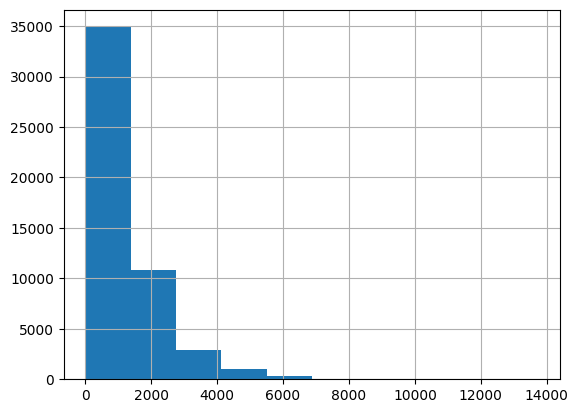

In [ ]:
data['review'].str.len().hist()
plt.show()

In [ ]:
# around 35,000 rows are having 0 to 1500 words and around 10,000+ rows are having 1500 to 2500 words

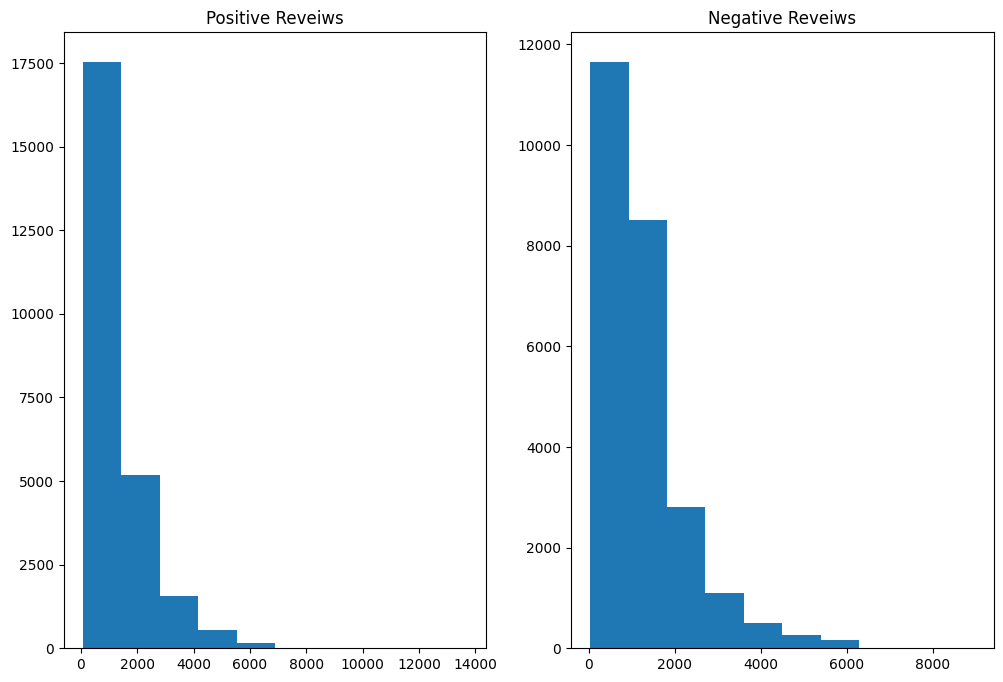

In [ ]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize =[12,8])
ax1.hist(data[data['sentiment']  == 'positive']['review'].str.len())
ax1.set_title("Positive Reveiws")
ax2.hist(data[data['sentiment']  == 'negative']['review'].str.len())
ax2.set_title("Negative Reveiws")
plt.show()

we can observe some insights from the graph above:
- In general, people comment less word in the positive review to compare with negative review
- However the range of word for positive review are bigger than the range of negative review. It means in some cases, people give a long comments for excellent movies and people could less critise for bad movies

Before we move on to the next section: data preprocessing to clean the text data, we will make a wordcloud graph to show the most used words in large font and the least used words in small font in positive review and negative review

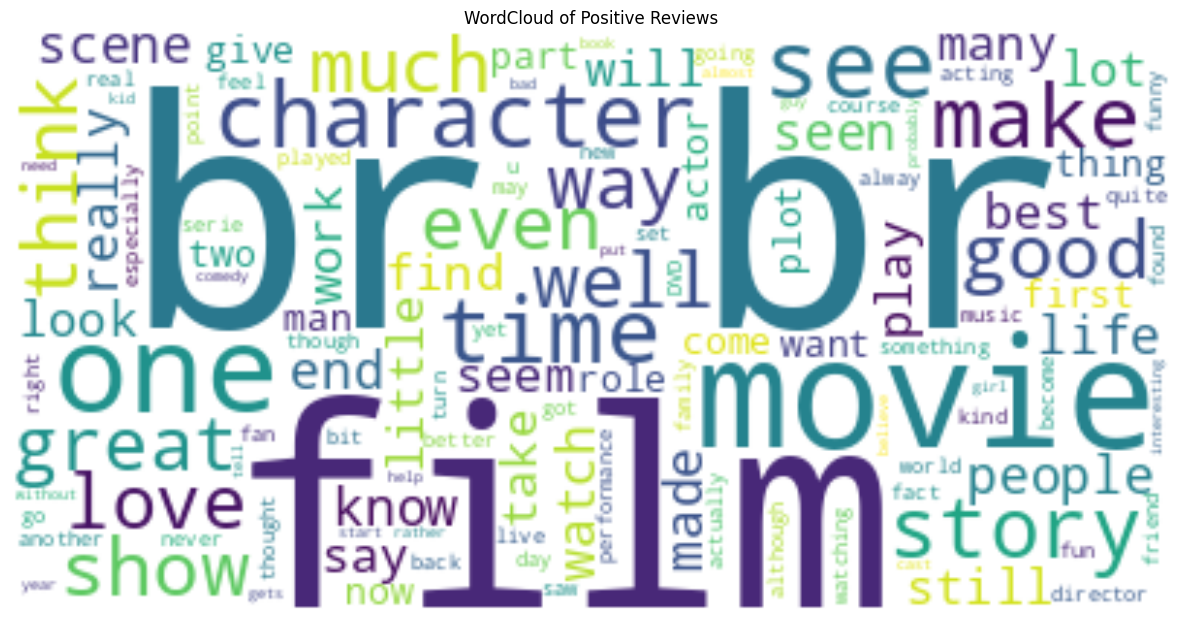

In [ ]:
# word cloud
text = ' '.join(i for i in data [data['sentiment']  ==  'positive']['review'])
wordcloud = WordCloud(background_color = 'white').generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("WordCloud of Positive Reviews")
plt.show()

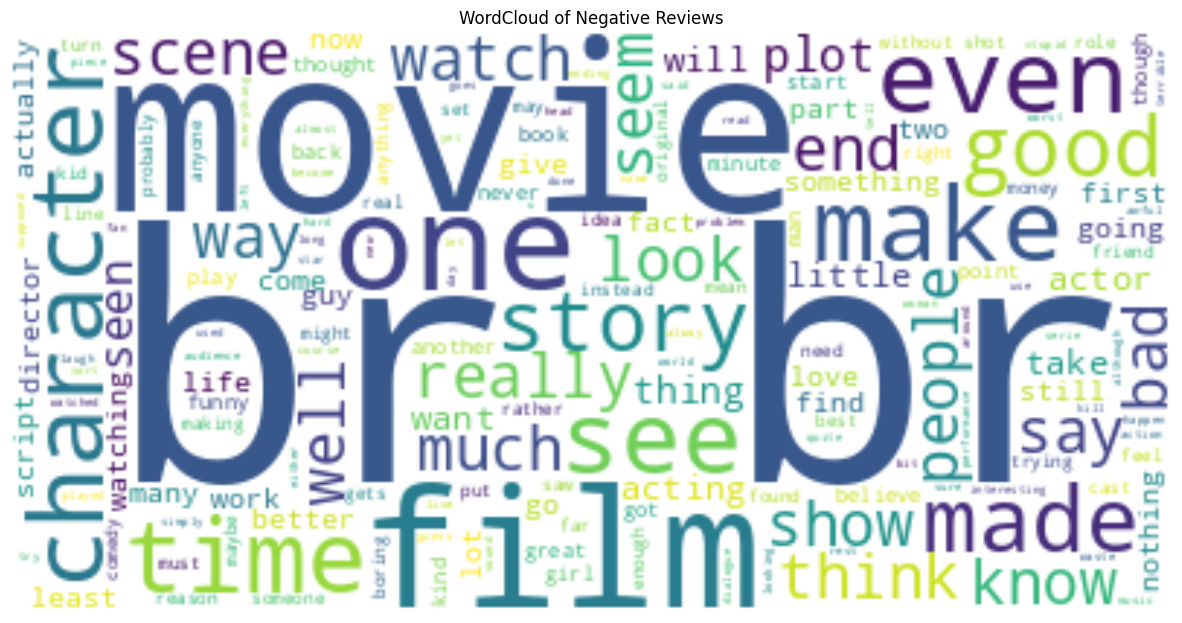

In [ ]:
text = ' '.join(i for i in data [data['sentiment']  ==  'negative']['review'])
wordcloud = WordCloud(background_color = 'white').generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("WordCloud of Negative Reviews")
plt.show()

The wordcloud graphs in both negative and postitive comments don't show meaningful result.

That's is the reason why text preprosessing is needed.

Let's start the preproceesing process.

In [ ]:
# let us clean the reviews column

data.rename(columns = {'review': 'text'}, inplace = True)
data.head()

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
def cleaning(text):
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number
    text = re.sub('<.*?>+', '', text) # removing special characters,
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    #removing emoji:
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"  #Miscellaneous Symbols
                           u"\U000024C2-\U0001F251"  #Enclosed Alphanumeric Supplement
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

   # removing short form:

    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    return text

In [ ]:
data1 = data['text'].apply(cleaning)
data1.head()

,text
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there s a family where a little boy ...
4,petter mattei s love in the time of money is...


In [ ]:
data1 = pd.DataFrame(data1)
data1['sentiment'] = data['sentiment']
data1.head()

,text,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is...,positive


In [ ]:
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
data1['no_sw'] = data1['text'].apply(lambda x: " ".join([word for word in x.split() if word not in (sw)]))

data1['no_sw'] = data1['text'].apply(lambda x:" ".join[word for word in x.split() if word not in (sw)])
data1.head()

,text,sentiment,no_sw
0,one of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,a wonderful little production the filming tec...,positive,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,basically there s a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,petter mattei s love in the time of money is...,positive,petter mattei love time money visually stunnin...


In [ ]:
from collections import Counter
cnt = Counter()
for text in data1['no_sw'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(15))
temp.columns=['word', 'count']
temp

,word,count
0,movie,87929
1,film,79656
2,one,53578
3,like,40155
4,good,29737
5,time,25094
6,even,24850
7,would,24599
8,story,23109
9,really,23090


In [ ]:
px.bar(temp, x = 'count', y = 'word', orientation = 'h', width = 700, height = 700, title = "Common Words in Text")

In [ ]:
freq_words = set([w for (w,wc) in cnt.most_common(15)])
def remove_freq_words(text):
    return " ".join([word for word in str(text).split() if word not in (freq_words)])


In [ ]:
data1['wo_freq_words'] = data1['no_sw'].apply (lambda text : remove_freq_words(text))
data1.head()

,text,sentiment,no_sw,wo_freq_words,wordnet_lm
0,one of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...,reviewers mentioned watching oz episode hooked...,reviewers mentioned watching oz episode hooked...
1,a wonderful little production the filming tec...,positive,wonderful little production filming technique ...,wonderful little production filming technique ...,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,thought wonderful way spend hot summer weekend...,thought wonderful way spend hot summer weekend...
3,basically there s a family where a little boy ...,negative,basically family little boy jake thinks zombie...,basically family little boy jake thinks zombie...,basically family little boy jake thinks zombie...
4,petter mattei s love in the time of money is...,positive,petter mattei love time money visually stunnin...,petter mattei love money visually stunning wat...,petter mattei love money visually stunning wat...


In [ ]:
data1['no_sw'].loc[5]

'probably time favorite movie story selflessness sacrifice dedication noble cause preachy boring never gets old despite seen times last years paul lukas performance brings tears eyes bette davis one truly sympathetic roles delight kids grandma says like dressed midgets children makes fun watch mother slow awakening happening world roof believable startling dozen thumbs movie'

In [ ]:
data1['wo_freq_words'].loc[5]

'probably favorite selflessness sacrifice dedication noble cause preachy boring never gets old despite seen times last years paul lukas performance brings tears eyes bette davis truly sympathetic roles delight kids grandma says dressed midgets children makes fun watch mother slow awakening happening world roof believable startling dozen thumbs'

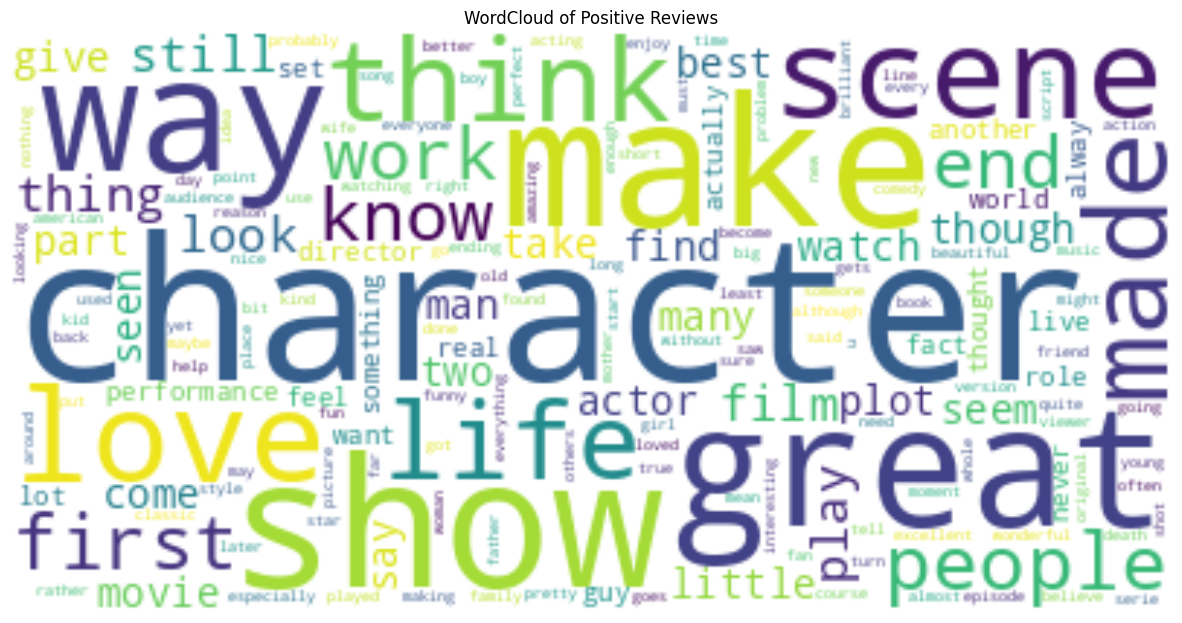

In [ ]:
text = ' '.join(i for i in data1[data1['sentiment']  ==  'positive']['wo_freq_words'])
wordcloud = WordCloud(background_color = 'white').generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("WordCloud of Positive Reviews")
plt.show()

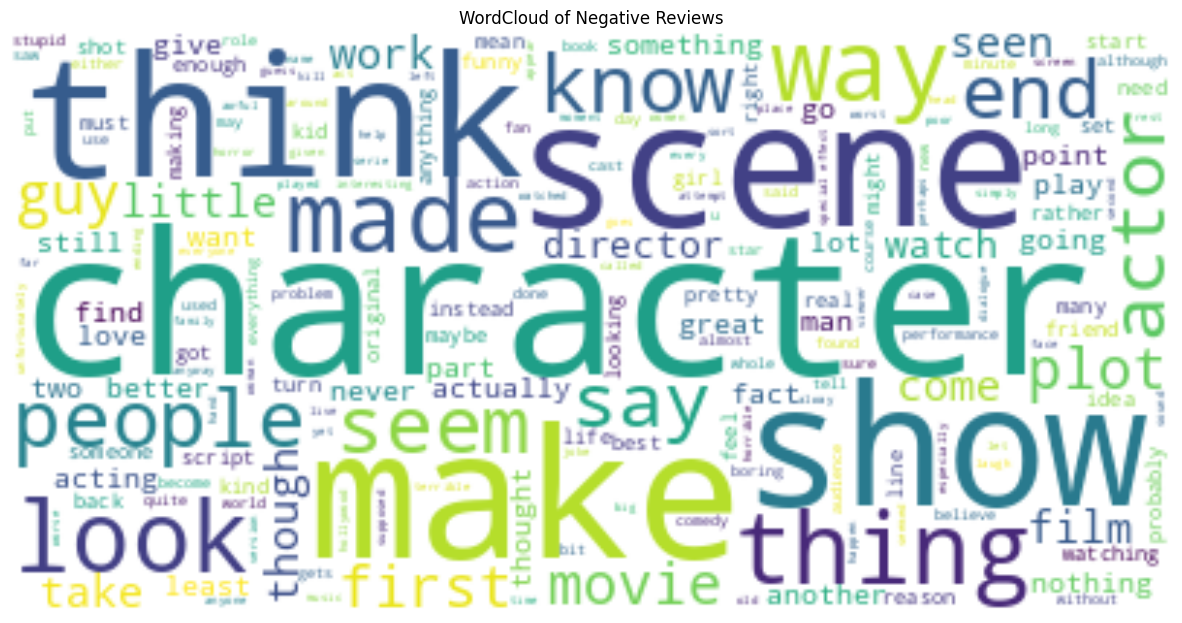

In [ ]:
text = ' '.join(i for i in data1 [data1['sentiment']  ==  'negative']['wo_freq_words'])
wordcloud = WordCloud(background_color = 'white').generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("WordCloud of Negative Reviews")
plt.show()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words.
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.

wordnet_lm = WordNetLemmatizer()
data1['wordnet_lm'] = data1['wo_freq_words'].apply(wordnet_lm.lemmatize)
data1.head()

,text,sentiment,no_sw,wo_freq_words,wordnet_lm
0,one of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...,reviewers mentioned watching oz episode hooked...,reviewers mentioned watching oz episode hooked...
1,a wonderful little production the filming tec...,positive,wonderful little production filming technique ...,wonderful little production filming technique ...,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,thought wonderful way spend hot summer weekend...,thought wonderful way spend hot summer weekend...
3,basically there s a family where a little boy ...,negative,basically family little boy jake thinks zombie...,basically family little boy jake thinks zombie...,basically family little boy jake thinks zombie...
4,petter mattei s love in the time of money is...,positive,petter mattei love time money visually stunnin...,petter mattei love money visually stunning wat...,petter mattei love money visually stunning wat...


In [ ]:
# create the cleaned data for the train-test split:
nb=data1.drop(columns=['text','no_sw', 'wo_freq_words'])
nb.columns=['sentiment','review']
nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]
nb

,sentiment,review
0,1,reviewers mentioned watching oz episode hooked...
1,1,wonderful little production filming technique ...
2,1,thought wonderful way spend hot summer weekend...
3,0,basically family little boy jake thinks zombie...
4,1,petter mattei love money visually stunning wat...
...,...,...
49995,1,thought right job creative original first expe...
49996,0,plot dialogue acting idiotic directing annoyin...
49997,0,catholic taught parochial elementary schools n...
49998,0,going disagree previous comment side maltin se...


In [ ]:
tokenized_review=nb['review'].apply(lambda x: x.split())
tokenized_review.head(5)

,review
0,"[reviewers, mentioned, watching, oz, episode, ..."
1,"[wonderful, little, production, filming, techn..."
2,"[thought, wonderful, way, spend, hot, summer, ..."
3,"[basically, family, little, boy, jake, thinks,..."
4,"[petter, mattei, love, money, visually, stunni..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['review'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

We will now split the data for training and testing to check how well our model has performed.

Also we will randomize the data in case our data includes all positive first and then all negative or some other kind of bias.

We will use: scikit_learn's train_test_split() for splitting the text_count (which contains our X) and dataset['Sentiment'] (this contains Y).

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))


ComplementNB model accuracy is 86.54%
------------------------------------------------
Confusion Matrix:
      0     1
0  4368   609
1   737  4286
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4977
           1       0.88      0.85      0.86      5023

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Interpret the result:

- ### Accuracy score:
is 86.33 % for the complementNB model. for each  of 100 total number of prediction, in average, our model can predict 86 cases correctly

-  The confusion matrix:
* True Positive: The actual value was 4349 negative reviews  and the model predicted 4367 negative reviews
* True Negative: The actual value was 4284 positive reviews and the model predict 4296 negative reviews
* False Positive: The actual values was 628 postive reviews and the model predicted 610 negative reviews
* False Negative: The actual values was 739 negative reviews and the model preditced 727 positive reviews

- Classification Report:

* ### Precision:
- Negative review: the ratio correctly predicted negative review observations to the total predicted negative review observations is 0.86
- Positive review: the ratio correctly predicted positive review observations to the total predicted positive review observations is 0.88

* ### Recall:
- Negative review: the ratio of correctly predicted negative review observations to the all observations in actual class is 0.88
- Positive review: the ratio of correctly predicted positive review observations to the all observations in actual class is 0.86

* F1 Score is the weighted average of Precision and Recall. In both case positive and negative review, F1 scores are equal 0.87

We can apply the same interpretation for the following models


In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 86.53%
------------------------------------------------
Confusion Matrix:
      0     1
0  4368   609
1   738  4285
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4977
           1       0.88      0.85      0.86      5023

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 84.77%
------------------------------------------------
Confusion Matrix:
      0     1
0  4409   568
1   955  4068
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      4977
           1       0.88      0.81      0.84      5023

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



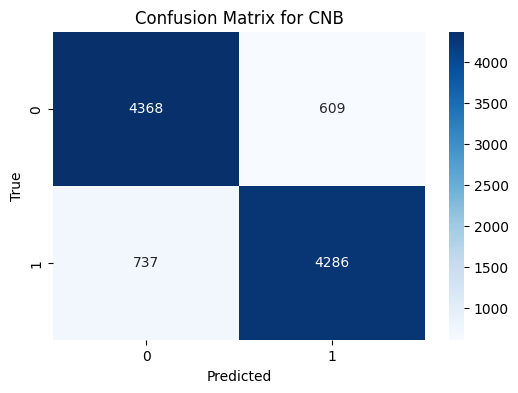

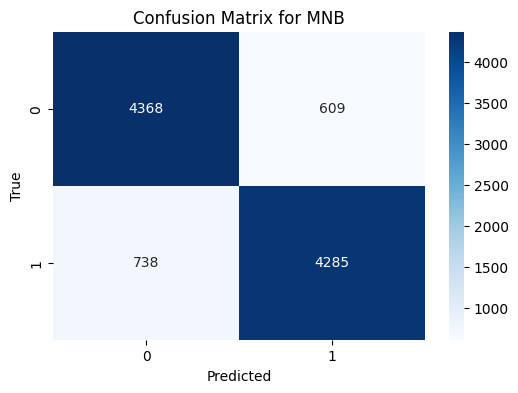

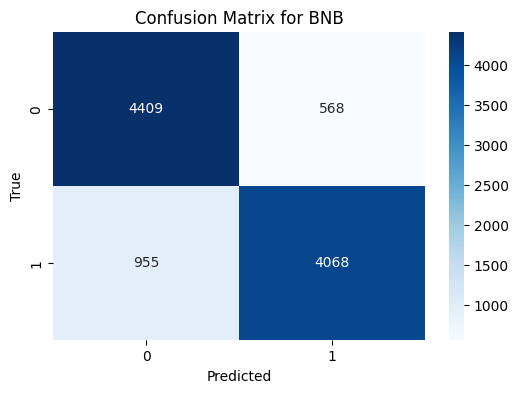

In [ ]:
from sklearn.metrics import confusion_matrix


k = [CNB, MNB, BNB]
model_names = ["CNB", "MNB", "BNB"]

for i, name in zip(k, model_names):
    # Get the predicted values
    y_pred = i.predict(X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


0.927642048905755 0.9276412888896728 0.9246170448966701


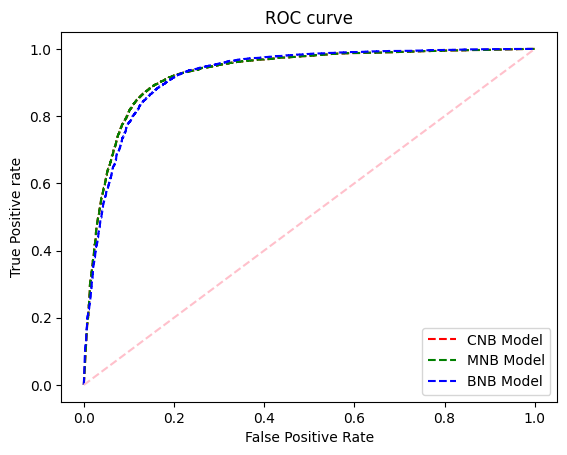

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models:
CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Referene:

https://www.jigsawacademy.com/blogs/ai-ml/bayes-theorem-in-machine-learning

https://www.upgrad.com/blog/bayes-theorem-in-machine-learning/

https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e

https://github.com/DrManishSharma/NLP/blob/master/SentiAnalysis.ipynb